In [2]:
from IPython.display import Image

# Reccurent Neural network

Sequence problems such as speech recognition and DNA seq data. You can use a standard nneural network to solve the problms.
However, there are challenges with this.
- Inputs, outputs can be different length in different examples.
- Doesn't share features leanred across different positions of text

Simple Recurrent Neural Networks use past information, but not information later.
However, bidirectional recurrent neural networks (BRNN) are used.

# Simplified RNN notation

\begin{eqnarray}
a^{t} &=& g(W_{aa}a^{t<-1>} + W_{ax}x^{t} + b_a) \\
\hat{y}^{<t>} &=& g(W_{ya} a^{<t>} + b_y)
\end{eqnarray}

## Forward propagation and backpropagation

\begin{eqnarray}
    L^{<t>}(\hat{y}^{<t>}, y^{t}) &=& -y^{<t>}\log \hat{y}^{<t>} - (1- y^{<t>})\log (1- \hat{y}^{<t>}) \\
    L(\hat{y}, y) &=& \sum_{t=1}^{T_y} L^{t} (\hat{y}^{t}, y^{t})
\end{eqnarray}

## Different types of RNNs
- one to many, Music generation

using one segment of music to generate subsequent music.

- many-to-one,

- many-to-many, machine translation

using multiple one language sentences to generate translated sentences.

You don't need RNNs for one-to-one problem.

## Language model and Sequence generation

### What is language modelling?
- Speech recognition

The language model to predict what is speeched in sound segments.

### Language modelling with a RNN 
- Training set: large corpus of English text.
    - Tokenize sentences
    eg. Cats average 15 hours of sleep in a day.
    
    -> 'Cats' 'averages' '15' 'hours' 'of' 'sleep' 'in' 'a' 'day'
    
    - tokenize unique words with a <UNQ>
    

# Sampling novel sequenecs

# Gated Recurrent Unit
[Cho et al., 2014](https://arxiv.org/abs/1409.1259)
[Chung et al., 2014](https://arxiv.org/abs/1412.3555)

## Full GRU
\begin{eqnarray}
\hat{C}^{<t>} &=& tanh (w_c[\Gamma_r \times C^{<t-1>}, x^t] + b_c) \\
\Gamma_u &=& \sigma(w_u [C^{<t-1>, x^{<t>}} + b_u]) \\
\Gamma_r &=& \sigma(w_r [C^{<t-1>, x^{<t>}} + b_u]) \\
C^{<t>} &=& \Gamma_u \times \hat{C^{<t>}} + (1-\gamma_u)\times C^{<t-1>}
\end{eqnarray}

Gate is open when it is in the needed timing.

# LSTM
[Hochreiter & Schmidhuber 1997 Long short-term memory](http://www.bioinf.jku.at/publications/older/2604.pdf)

\begin{eqnarray}
    \hat{c}^{<t>} &=& tanh(w_u[a^{<t-1>}, x^{<t>}] + b_c) \\
    \Gamma_u &=& \sigma (W_u [a^{<t-1>}, x^{<t>}] + b_f) \\
    \Gamma_o &=& \sigma (W_p [a^{<t-1>}, x^{<t>}] + b_o) \\
    c^{<t>} &=& \Gamma_u \times \hat{c}^{<t>} + \Gamma_f \times c^{<t-1>} \\
    a^{<t>} &=& \Gamma_o \times \tanh c^{<t>}
\end{eqnarray}

## Bidirectional RNN


# Week 1Quizes .

## 1. Suppose your training examples are sentences (sequences of words). Which of the following refers to the $j^{th}$  word in the $i^{th}$ training example?
- 1 $x^{(i)<j>}$
- 2 $ x^{<i>(j)}$
- 3 $ x^{(j)<i>}$
- 4 $ x^{<j>(i)}$

Answer: $x^{(i)<j>}$ (correct)

## 2. Consider this RNN:

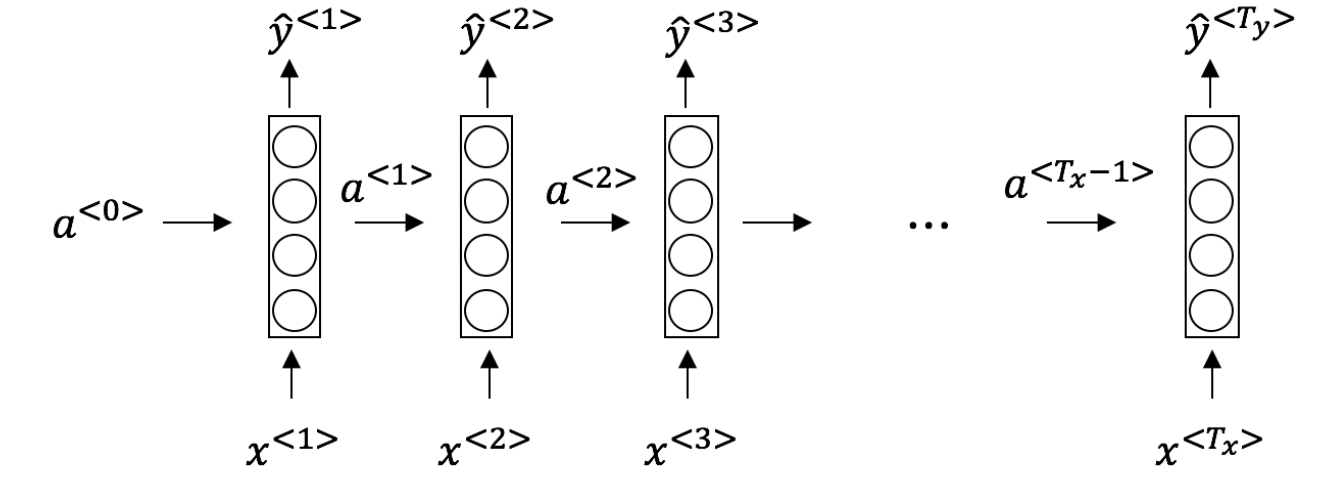

In [11]:
Image('SequenceModelWeek1_fig1.png')

This specific type of architecture is appropriate when:
- $T_x = T_y$
- $T_x < T_y$
- $T_x > T_y$
- $T_x = 1$

Answer: $T_x = T_y$ (correct)

## 3. To which of these tasks would you apply a many-to-one RNN architecture? (Check all that apply).



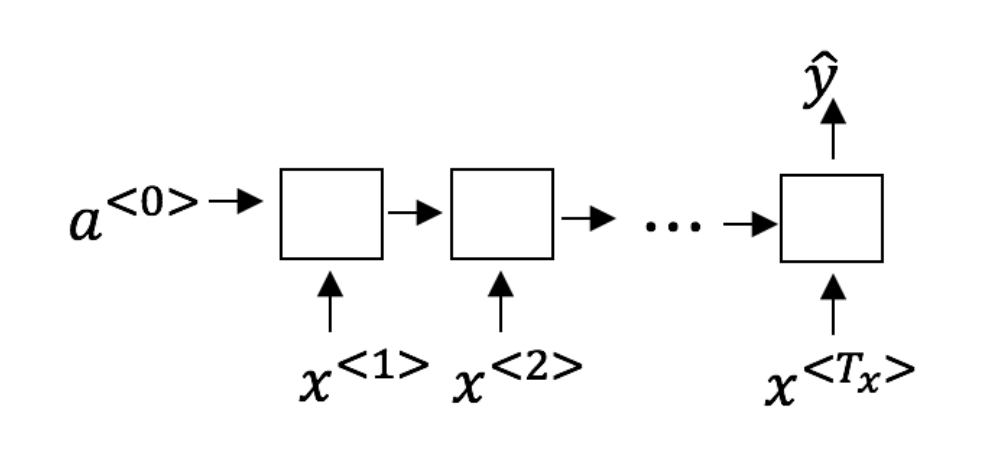

In [5]:
Image('SequenceModelWeek1_fig2.png')

- Speech recognition (input an audio clip and output a transcript)
- Sentiment classification (input a piece of text and output a 0/1 to denote positive or negative sentiment)
- Image classification (input an image and output a label)
- Gender recognition from speech (input an audio clip and output a label indicating the speaker’s gender)

### Answer:  (correct)
- Sentiment classification (input a piece of text and output a 0/1 to denote positive or negative sentiment)
- Gender recognition from speech (input an audio clip and output a label indicating the speaker’s gender)

## 4 You are training this RNN language model.

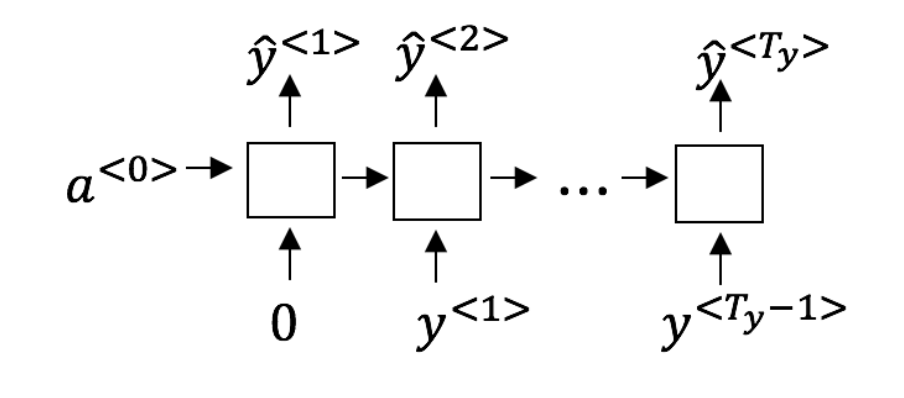

In [6]:
Image('SequenceModelWeek1_fig3.png')

At the $t^{th}$ time step, what is the RNN doing? Choose the best answer.
- Estimating $P(y^{<1>}, y^{<2>}, \dots, y^{<t-1>})$
- Estimating $P(y^{<t>})$
- Estimating $P(y^{<t>}|y^{<1>}, y^{<2>}, \dots, y^{<t-1>})$
- Estimating $P(y^{<t>}|y^{<1>}, y^{<2>}, \dots, y^{<t>})$

### Answr:  Estimating $P(y^{<t>}|y^{<1>}, y^{<2>}, \dots, y^{<t-1>})$ (correct)

## 5. You have finished training a language model RNN and are using it to sample random sentences, as follows:

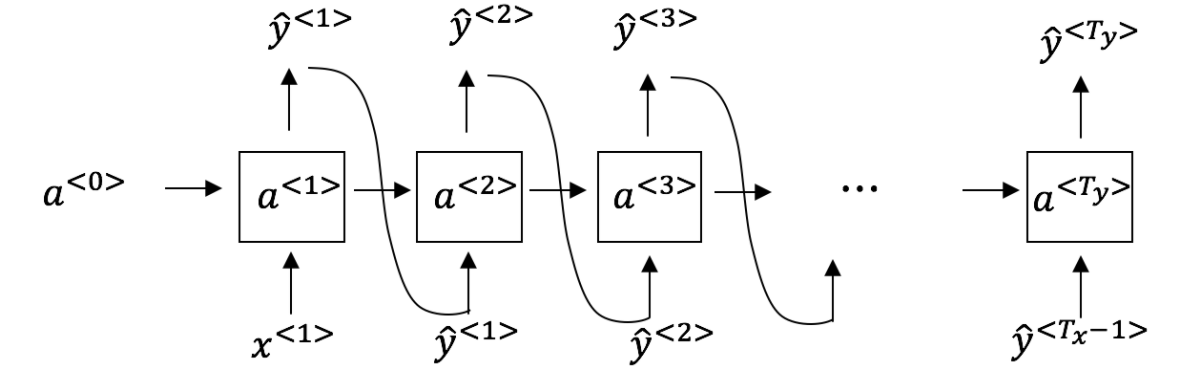

In [8]:
Image('SequenceModelWeek1_fig4.png')

What are you doing at each time step t?
- (i) Use the probabilities output by the RNN to pick the highest probability word for that time-step as $\hat{y}^{<t>}$. (ii) Then pass the ground-truth word from the training set to the next time-step.
- (i) Use the probabilities output by the RNN to randomly sample a chosen word for that time-step as $\hat{y}^{<t>}$. (ii) Then pass the ground-truth word from the training set to the next time-step.
- (i) Use the probabilities output by the RNN to pick the highest probability word for that time-step as $\hat{y}^{<t>}$. (ii) Then pass this selected word to the next time-step.
- (i) Use the probabilities output by the RNN to randomly sample a chosen word for that time-step as $\hat{y}^{<t>}$. (ii) Then pass this selected word to the next time-step.

### Answer: (i) Use the probabilities output by the RNN to randomly sample a chosen word for that time-step as $\hat{y}^{<t>}$. (ii) Then pass this selected word to the next time-step.

## 6. You are training an RNN, and find that your weights and activations are all taking on the value of NaN (“Not a Number”). Which of these is the most likely cause of this problem?
- Vanishing gradient problem.
- Exploding gradient problem.
- ReLU activation function g(.) used to compute g(z), where z is too large.
- Sigmoid activation function g(.) used to compute g(z), where z is too large.

### Vanishing gradient problem.

## 7. Suppose you are training a LSTM. You have a 10000 word vocabulary, and are using an LSTM with 100-dimensional activations $a^{<t>}$. What is the dimension of  $\Gamma_u$ at each time step?
- 1
- 100
- 300
- 10000

### Answer: 100 (correct)

## 8. Here’re the update equations for the GRU.

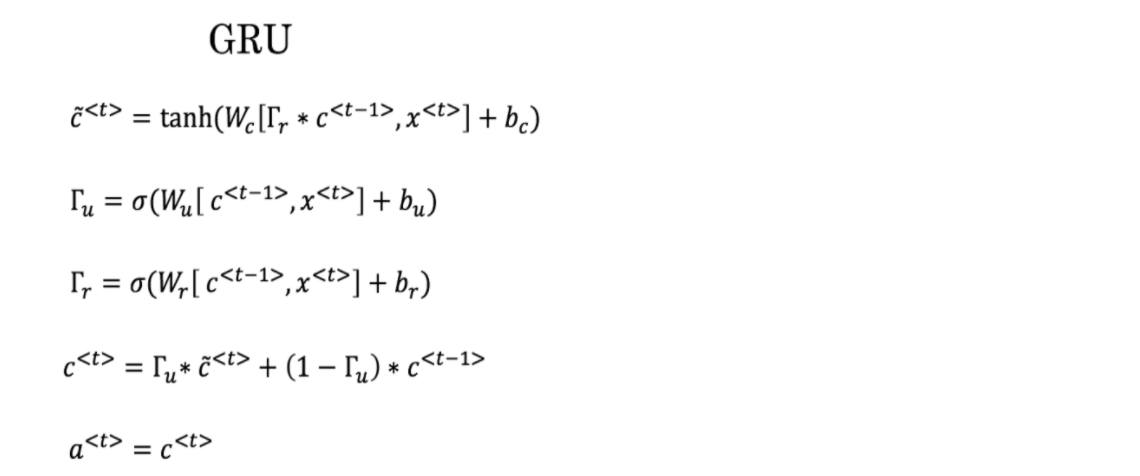

In [9]:
Image('SequenceModelWeek1_fig5.png')

Alice proposes to simplify the GRU by always removing the $\Gamma_u$ . I.e., setting $\Gamma_u$  = 1. Betty proposes to simplify the GRU by removing the $\Gamma_r$. I. e., setting $\Gamma_r$ = 1 always. Which of these models is more likely to work without vanishing gradient problems even when trained on very long input sequences?

- Alice’s model (removing $\Gamma_u$), because if $\Gamma_r\approx 0$ for a timestep, the gradient can propagate back through that timestep without much decay.
- Alice’s model (removing $\Gamma_u$), because if $\Gamma_r\approx 1$  for a timestep, the gradient can propagate back through that timestep without much decay.
- Betty’s model (removing $\Gamma_r$), because if $\Gamma_u \approx 0$ for a timestep, the gradient can propagate back through that timestep without much decay.
- Betty’s model (removing $\Gamma_r$), because if $\Gamma_u \approx 1$  for a timestep, the gradient can propagate back through that timestep without much decay.

### Answer.  Betty’s model (removing $\Gamma_r$), because if $\Gamma_u \approx 0$ for a timestep, the gradient can propagate back through that timestep without much decay. (correct)

## 9 Here are the equations for the GRU and the LSTM:

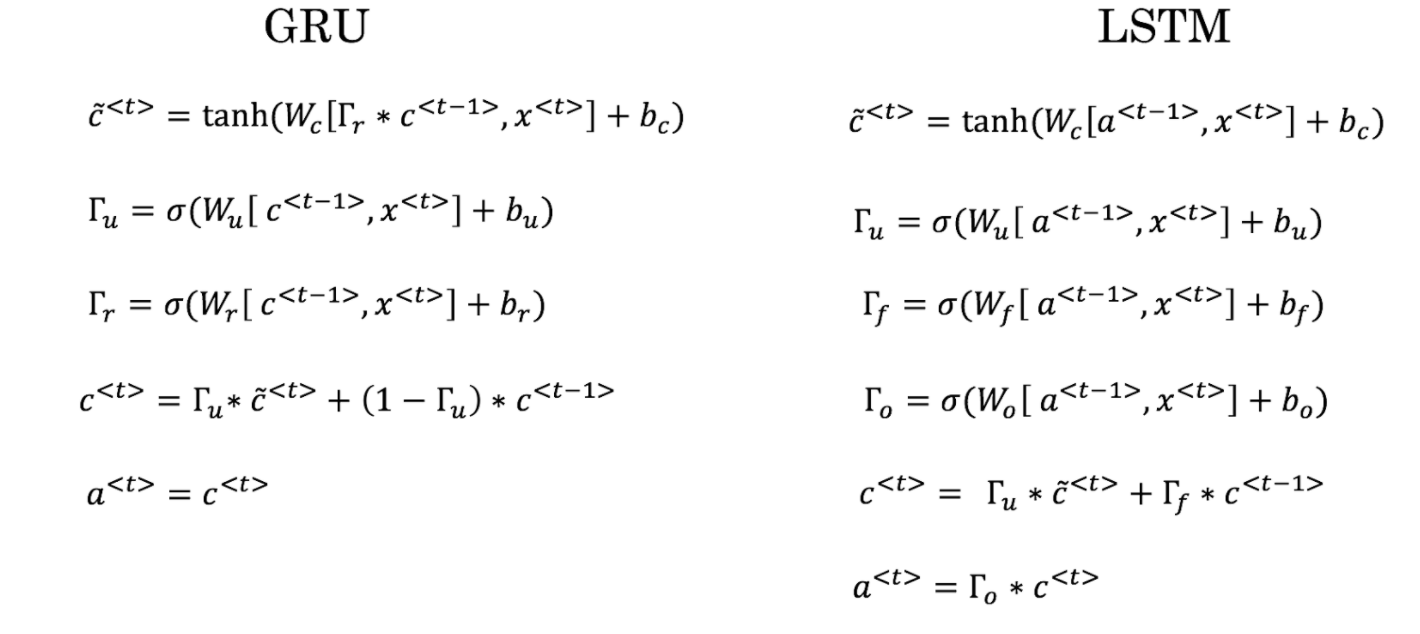

In [10]:
Image('SequenceModelWeek1_fig6.png')

From these, we can see that the Update Gate and Forget Gate in the LSTM play a role similar to _______ and ______ in the GRU. What should go in the the blanks?

- $\Gamma_u$ and $1-\Gamma_u$
- $\Gamma_r$ and $\Gamma_u$
- $1-\Gamma_u$ and $\Gamma_u$
- $\Gamma_r$ and $\Gamma_u$

### Answer:  $\Gamma_u$ and $1-\Gamma_u$ (correct)

You have a pet dog whose mood is heavily dependent on the current and past few days’ weather. You’ve collected data for the past 365 days on the weather, which you represent as a sequence as $x^{<1>}, \dots, x^{<365>}$. You’ve also collected data on your dog’s mood, which you represent as $y^{<1>}, \dots, y^{<365>}$. You’d like to build a model to map from $x \rightarrow y$. Should you use a Unidirectional RNN or Bidirectional RNN for this problem?

- Bidirectional RNN, because this allows the prediction of mood on day t to take into account more information.
- Bidirectional RNN, because this allows backpropagation to compute more accurate gradients.
- Unidirectional RNN, because the value of $y^{<t>}$ depends only on $x^{<1>}, \dots, x^{<t>}$, but not on $x^{<t+1>}, \dots, x^{<365>}$
- Unidirectional RNN, because the value of $y^{<t>}$ depends only on $x^{<t>}$ , and not other days’ weather.

### Answer:  Unidirectional RNN, because the value of $y^{<t>}$ depends only on $x^{<1>}, \dots, x^{<t>}$, but not on $x^{<t+1>}, \dots, x^{<365>}$ (correct)